In [194]:
import numpy as np
import os, glob
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import datetime
from datetime import timedelta
import seaborn as sb

from matplotlib.colors import Normalize
import matplotlib.ticker as mticker
from pandas import Series, DataFrame
from pylab import rcParams
from netCDF4 import Dataset
from scipy import interpolate
from datetime import date, timedelta

from scipy import stats
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

from dateutil import tz
import time as timemod
from scipy.interpolate import griddata

## Atmospheric MERRA2 Data

In [312]:
years  = ['2008', '2010', '2012', '2013']
months = ['01', '02', '12']
vals_m = ['300', '300', '400', '400', ]
lat1 = 60  ; lat2 = 90
lon1 = -180; lon2 = 180

for y, year in enumerate(years): # (['2008']):
    for month in months:  # ['01']:
        dirc_merra = '/data/chchang/Reanalysis/MERRA2/instM_3d_asm_Np/' + year + '/'        
        merra_file = dirc_merra + 'MERRA2_' + vals_m[y] + '.instM_3d_asm_Np.' + year + month + '.nc4'
        if y == 0 and month == '01':
            merra_lat = Dataset(merra_file).variables['lat'][:]
            merra_lon = Dataset(merra_file).variables['lon'][:]
            merra_P   = Dataset(merra_file).variables['lev'][:]

            id_la = np.where((merra_lat >= lat1) & (merra_lat <= lat2))[0]
            id_lo = np.where((merra_lon >= lon1) & (merra_lon <= lon2))[0]
            
            merra_H   = Dataset(merra_file).variables['H'][:,:,id_la, id_lo]
            merra_T   = Dataset(merra_file).variables['T'][:,:,id_la, id_lo]

            merra_lon = merra_lon[id_lo]
            merra_lat = merra_lat[id_la]
            merra_lon_msh, merra_lat_msh = np.meshgrid(merra_lon, merra_lat)
        else:
            merra_H   = np.concatenate([merra_H, Dataset(merra_file).variables['H'][:,:,id_la, id_lo]], axis=0)
            merra_T   = np.concatenate([merra_T, Dataset(merra_file).variables['T'][:,:,id_la, id_lo]], axis=0)            

In [373]:
merra_T[merra_T > 4000]  = np.nan
merra_H[merra_H > 50000] = np.nan
merra_H_mean = np.nanmean(merra_H, 0)
merra_T_mean = np.nanmean(merra_T, 0)

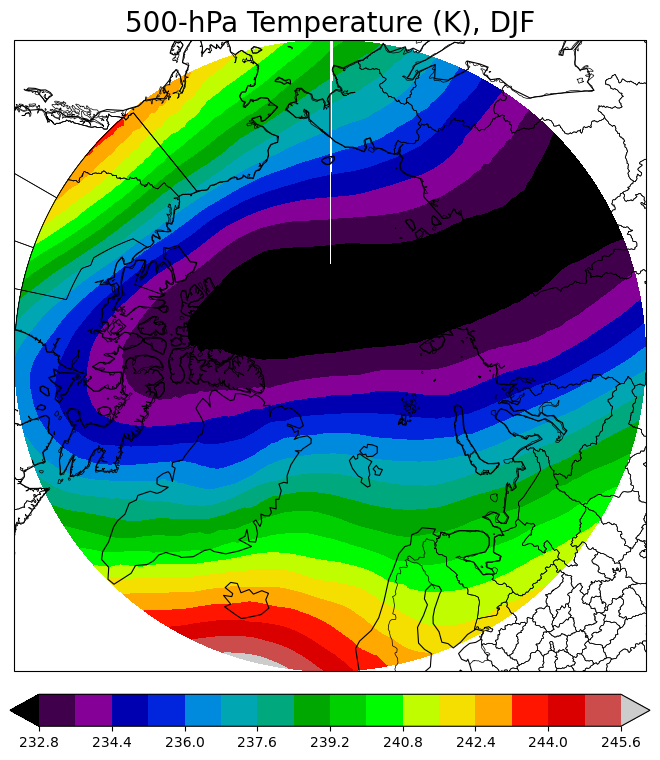

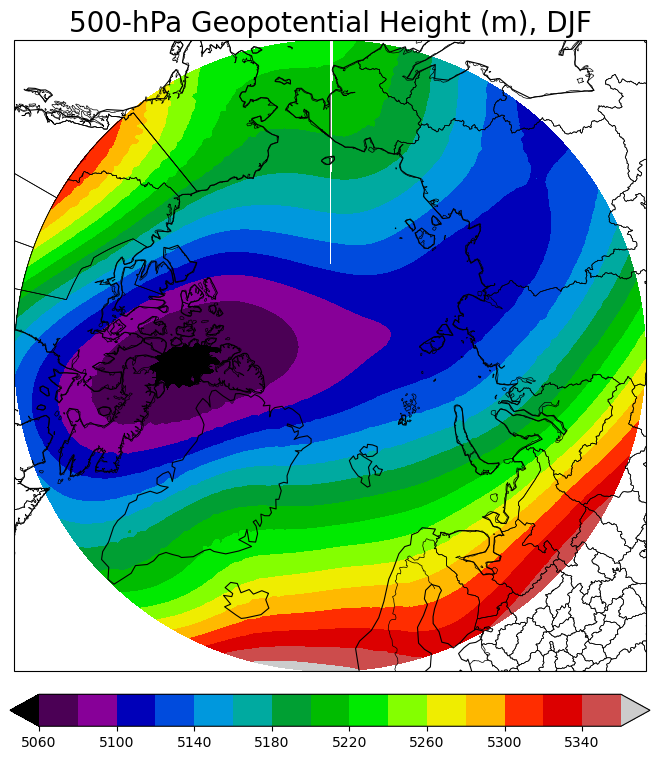

In [384]:
proj =ccrs.NorthPolarStereo(central_longitude=0.0, globe=None) # PlateCarree(central_longitude=0.0, globe=None)
lev = 500
idx_lev = np.where(merra_P == lev)[0][0]

###
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = proj)
clevs = 20 # np.arange(270, 296, 1)
csf = ax.contourf(merra_lon, merra_lat, merra_T_mean[idx_lev,:,:], clevs, cmap = 'nipy_spectral', extend = 'both', transform = ccrs.PlateCarree()) #
ax.coastlines(resolution='110m', linewidth=.8)
#ax.set_extent([lon1, lon2, lat1, lat2], ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linewidth=.5)
ax.add_feature(cfeature.STATES, linewidth=.5)
plt.title(str(lev) + '-hPa Temperature (K), DJF', fontsize = 20)
cb = plt.colorbar(csf, shrink=.8, pad=0.03, orientation='horizontal')
plt.tight_layout(pad=0)
#plt.savefig(out_dirc + 'map_' + in_file[:-3] + '.png', dpi=300)
plt.show()

###
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = proj)
clevs = 20 # np.arange(270, 296, 1)
csf = ax.contourf(merra_lon, merra_lat, merra_H_mean[idx_lev,:,:], clevs, cmap = 'nipy_spectral', extend = 'both', transform = ccrs.PlateCarree()) #
ax.coastlines(resolution='110m', linewidth=.8)
#ax.set_extent([lon1, lon2, lat1, lat2], ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linewidth=.5)
ax.add_feature(cfeature.STATES, linewidth=.5)
plt.title(str(lev) + '-hPa Geopotential Height (m), DJF', fontsize = 20)
cb = plt.colorbar(csf, shrink=.8, pad=0.03, orientation='horizontal')
plt.tight_layout(pad=0)
#plt.savefig(out_dirc + 'map_' + in_file[:-3] + '.png', dpi=300)
plt.show()

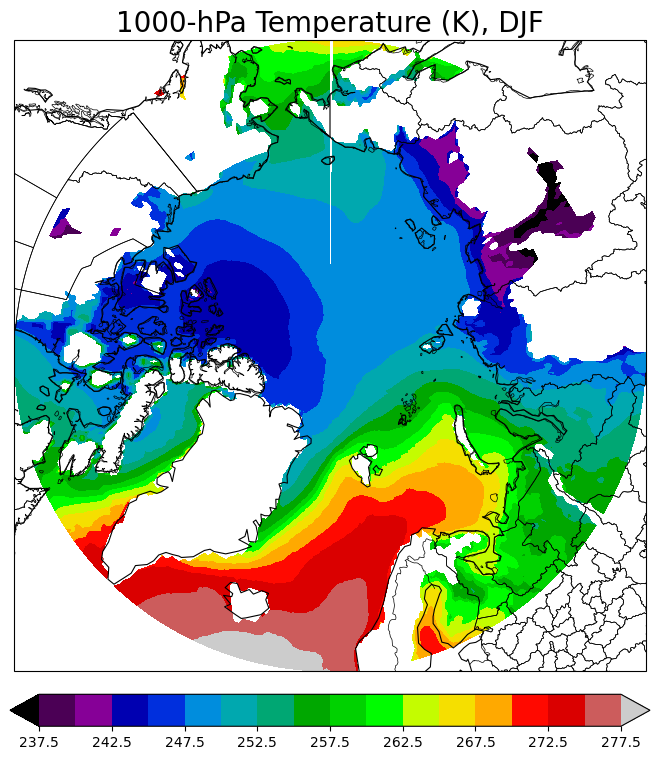

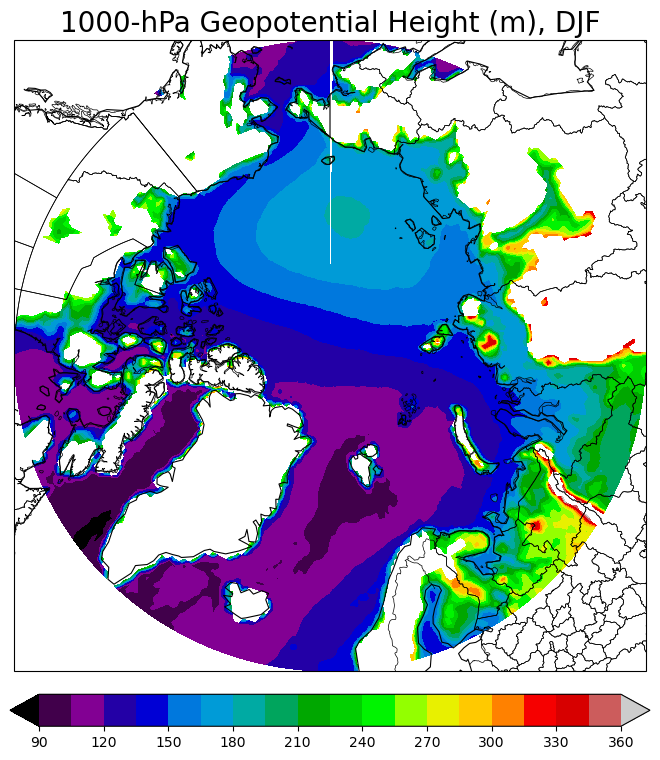

In [385]:
proj =ccrs.NorthPolarStereo(central_longitude=0.0, globe=None) # PlateCarree(central_longitude=0.0, globe=None)
lev = 1000
idx_lev = np.where(merra_P == lev)[0][0]

###
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = proj)
clevs = 20 # np.arange(270, 296, 1)
csf = ax.contourf(merra_lon, merra_lat, merra_T_mean[idx_lev,:,:], clevs, cmap = 'nipy_spectral', extend = 'both', transform = ccrs.PlateCarree()) #
ax.coastlines(resolution='110m', linewidth=.8)
#ax.set_extent([lon1, lon2, lat1, lat2], ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linewidth=.5)
ax.add_feature(cfeature.STATES, linewidth=.5)
plt.title(str(lev) + '-hPa Temperature (K), DJF', fontsize = 20)
cb = plt.colorbar(csf, shrink=.8, pad=0.03, orientation='horizontal')
plt.tight_layout(pad=0)
#plt.savefig(out_dirc + 'map_' + in_file[:-3] + '.png', dpi=300)
plt.show()

###
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = proj)
clevs = 20 # np.arange(270, 296, 1)
csf = ax.contourf(merra_lon, merra_lat, merra_H_mean[idx_lev,:,:], clevs, cmap = 'nipy_spectral', extend = 'both', transform = ccrs.PlateCarree()) #
ax.coastlines(resolution='110m', linewidth=.8)
#ax.set_extent([lon1, lon2, lat1, lat2], ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linewidth=.5)
ax.add_feature(cfeature.STATES, linewidth=.5)
plt.title(str(lev) + '-hPa Geopotential Height (m), DJF', fontsize = 20)
cb = plt.colorbar(csf, shrink=.8, pad=0.03, orientation='horizontal')
plt.tight_layout(pad=0)
#plt.savefig(out_dirc + 'map_' + in_file[:-3] + '.png', dpi=300)
plt.show()

## Average profiles

In [405]:
area_weights = np.cos(np.deg2rad(merra_lat_msh))

merra_H_mean_arctic = merra_P.copy()
merra_H_mean_arctic[:] = np.nan
merra_T_mean_arctic = merra_P.copy()
merra_T_mean_arctic[:] = np.nan
for i in range(len(merra_P)):
    area_weights_nan = area_weights.copy()
    area_weights_nan[np.isnan(merra_H_mean[i,:,:]) == 1] = np.nan
    merra_H_mean_arctic[i] = np.nansum(np.nansum(merra_H_mean[i,:,:] * area_weights_nan, 1), 0)\
                        / np.nansum(np.nansum(area_weights_nan,1),0)
    area_weights_nan = area_weights.copy()
    area_weights_nan[np.isnan(merra_T_mean[i,:,:]) == 1] = np.nan    
    merra_T_mean_arctic[i] = np.nansum(np.nansum(merra_T_mean[i,:,:] * area_weights_nan, 1), 0)\
                        / np.nansum(np.nansum(area_weights_nan,1),0)
    
merra_T_min = np.nanmin(np.nanmin(merra_T_mean,2),1)
merra_T_max = np.nanmax(np.nanmax(merra_T_mean,2),1)

merra_H_min = np.nanmin(np.nanmin(merra_H_mean,2),1)
merra_H_max = np.nanmax(np.nanmax(merra_H_mean,2),1)

In [440]:
H_hypsometric = ( (1000 / merra_P) ** (1 / 5.257) - 1) * merra_T_mean_arctic / 0.0065

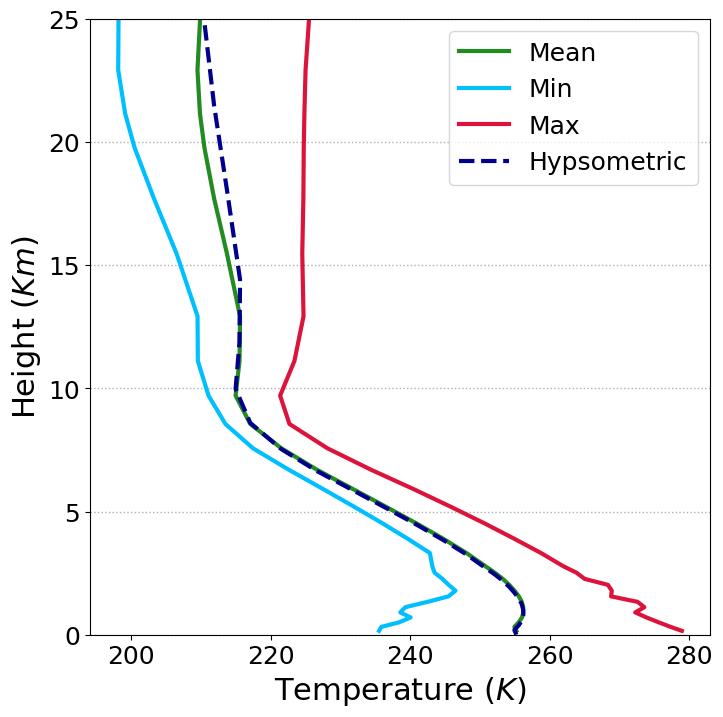

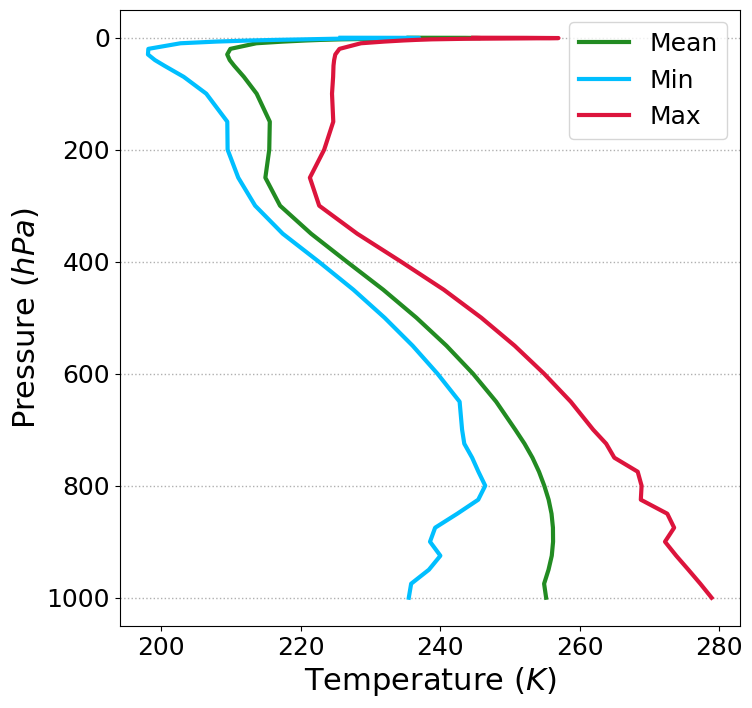

In [567]:
####
fig   = plt.figure(figsize=(8,8))
axis  = plt.axes()
                      
axis.plot(merra_T_mean_arctic, merra_H_mean_arctic / 1000, linewidth= 3, color='forestgreen', label='Mean')
axis.plot(merra_T_min, merra_H_mean_arctic / 1000, linewidth= 3, color='deepskyblue', label='Min')
axis.plot(merra_T_max, merra_H_mean_arctic / 1000, linewidth= 3, color='crimson', label='Max')
axis.plot(merra_T_mean_arctic, H_hypsometric / 1000, '--', linewidth= 3, color='darkblue', label='Hypsometric')
axis.set_ylabel('Height ($Km$)', fontsize = '22')
axis.set_xlabel('Temperature ($K$)', fontsize = '22')
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', axis='y', linewidth=1)
axis.legend(fontsize=18)
#axis.set_ylim([1e-1, 1.5e2])
axis.set_ylim([0, 25])
#axis.set_yscale('log')
plt.show()

####
fig   = plt.figure(figsize=(8,8))
axis  = plt.axes()
                      
axis.plot(merra_T_mean_arctic, merra_P, linewidth= 3, color='forestgreen', label='Mean')
axis.plot(merra_T_min, merra_P, linewidth= 3, color='deepskyblue', label='Min')
axis.plot(merra_T_max, merra_P, linewidth= 3, color='crimson', label='Max')
axis.set_ylabel('Pressure ($hPa$)', fontsize = '22')
axis.set_xlabel('Temperature ($K$)', fontsize = '22')
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', axis='y', linewidth=1)
axis.legend(fontsize=18)
#axis.set_ylim([1.1e3, 1e-5])
#axis.set_ylim([1e-5, 1.1e4])
#axis.set_yscale('log')
plt.gca().invert_yaxis()
plt.show()

## Cloud Properties by Satellite

In [443]:
def extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_ALL_16Nov2022/', \
                file='iwcCombSPAsyanEM16ATPOEM16-65_-60iab010_170350_HIGH_land_DN08101213WIN_ALL.csv', \
                nit_row=6, var_order=2):    
    
    df = pd.read_csv(dirc + file,  header=None)
    # df = pd.read_fwf(dirc + file, delimiter=' |:', header=None)
    np_df = df.to_numpy() 
    np_df_vals = np_df[:,1:]

    columns = []
    ncol    = len(np_df) // init_row
    nrow    = 25
    new_np  = np.zeros(nrow*ncol).reshape(nrow,ncol)
    new_np[:]= np.nan

    for i in range(ncol):

        var = np.concatenate((np_df_vals[init_row * i + 1:init_row * (i+1)]),0)
        # var = var[np.isnan(var) == 0]
        # var = var[~np.isnan(var)]
        var = var[~pd.isnull(var)]
        var = np.array([float(ii) for ii in var])

        var_label = ' '.join([item for item in np_df[init_row * i,:] if type(item) is str])
        columns.append(var_label)
        new_np[:,i] = var

    T   = new_np[:,0]
    # IWC = new_np[:,-1]
    IWC = new_np[:,var_order]
    IWC[IWC < 0] = np.nan    
    
    return T, IWC

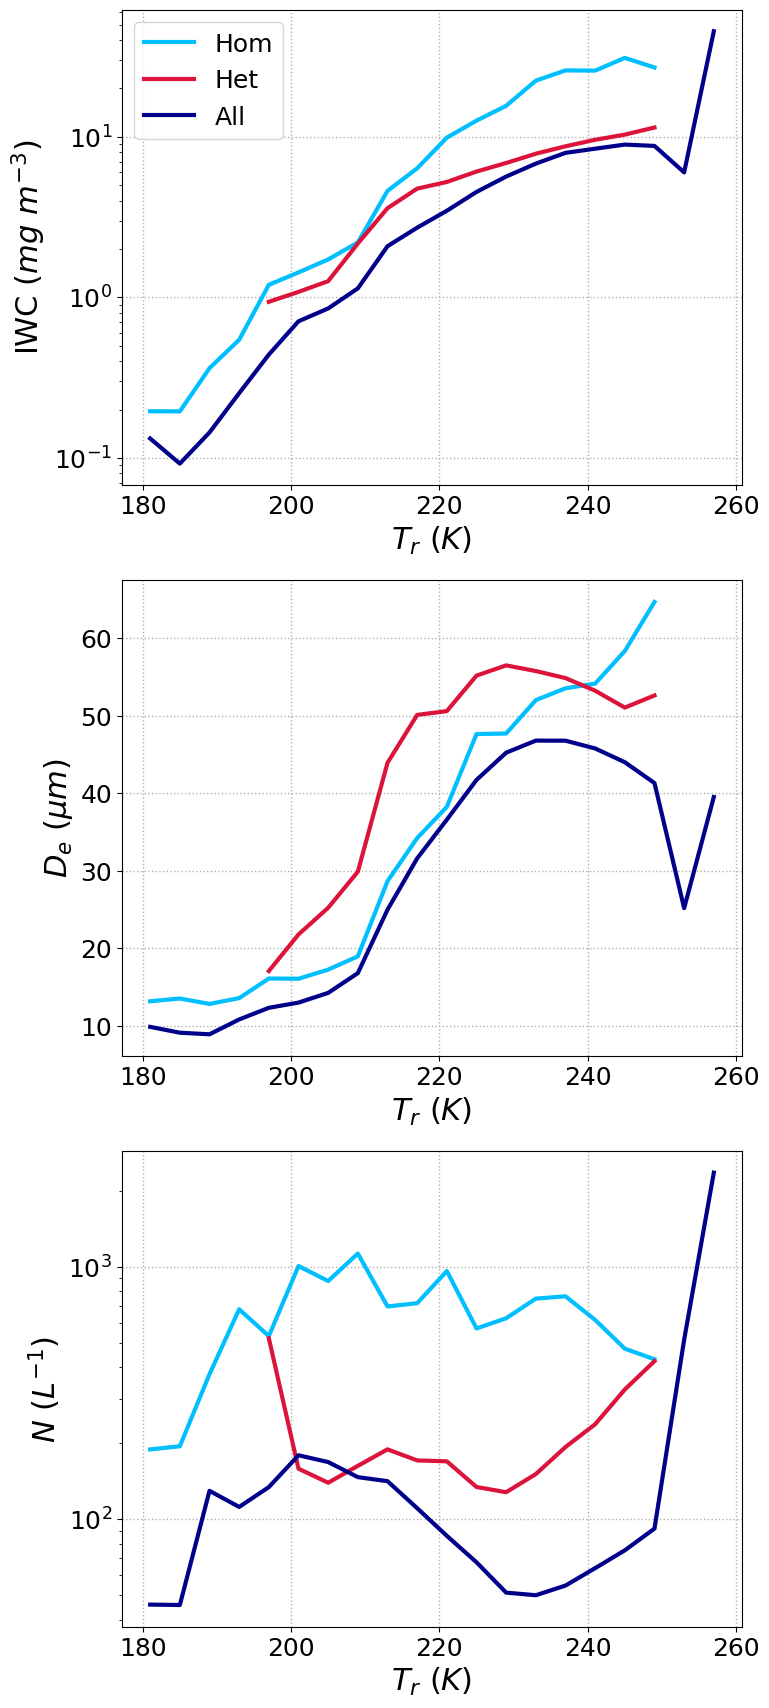

In [444]:
T, IWC = extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_ALL_16Nov2022/', \
                file='iwcCombSPAsyanEM16ATPOEM16-65_-60iab010_170350_HIGH_land_DN08101213WIN_ALL.csv', \
                nit_row=6, var_order=2)

T, De  = extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_ALL_16Nov2022/', \
                file='deCombSPAsyanEM16ATPOEM16-65_-60iab010_1702350_HIGH_land_DN08101213WIN_ALL.csv', \
                nit_row=6, var_order=2)

T, ni  = extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_ALL_16Nov2022/', \
                file='niCombSPAsyanEM16ATPOEM16-65_-60iab010_170350_HIGH_land_DN08101213WIN_ALL.csv', \
                nit_row=6, var_order=2)

T, IWC_hom = extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_16Nov2022/', \
                file='IWChomCombSPAsyanEM16ATPOEM16-65_-60iab010_170350_HIGH_land_DN08101213WIN.csv', \
                nit_row=6, var_order=-1)

T, De_hom  = extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_16Nov2022/', \
                file='dehomCombSPAsyanEM16ATPOEM16-65_-60iab010_170350_HIGH_land_DN08101213WIN.csv', \
                nit_row=6, var_order=-1)

T, ni_hom  = extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_16Nov2022/', \
                file='NhomCombSPAsyanEM16ATPOEM16-65_-60iab010_170350_HIGH_land_DN08101213WIN.csv', \
                nit_row=6, var_order=-1)

T, IWC_het = extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_16Nov2022/', \
                file='IWChetCombSPAsyanEM16ATPOEM16-65_-60iab010_170350_HIGH_land_DN08101213WIN.csv', \
                nit_row=6, var_order=-1)

T, De_het  = extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_16Nov2022/', \
                file='dehetCombSPAsyanEM16ATPOEM16-65_-60iab010_170350_HIGH_land_DN08101213WIN.csv', \
                nit_row=6, var_order=-1)

T, ni_het  = extract_var(dirc='./Files_for_David_HIGH_LAND_WIN_16Nov2022/', \
                file='NhetCombSPAsyanEM16ATPOEM16-65_-60iab010_170350_HIGH_land_DN08101213WIN.csv', \
                nit_row=6, var_order=-1)

#######
fig, axis = plt.subplots(3, 1, figsize=(8,21))

i = 0
axis[i].plot(T, IWC_hom, linewidth= 3, color='deepskyblue', label='Hom')
axis[i].plot(T, IWC_het, linewidth= 3, color='crimson'    , label='Het')
axis[i].plot(T, IWC    , linewidth= 3, color='darkblue'   , label='All')
axis[i].set_ylabel('IWC ($mg$ $m^{-3}$)', fontsize = '22')
axis[i].set_xlabel('$T_r$ ($K$)', fontsize = '22')
#axis[i].set_yticks([-400, -300, -200, -100, 0])
#axis[i].set_xlim([0, 1000])
#axis[i].set_ylim([-420, 20])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].set_yscale('log')
#axis[i].legend(fontsize = '18', loc='lower right')
#plt.title(str(traj_t)+'-hr Lagrangian Trajectories, JJA 2018-2021', fontsize = 22)
legend = axis[i].legend(fontsize=18)    

i = 1
axis[i].plot(T, De_hom, linewidth= 3, color='deepskyblue', label='Hom')
axis[i].plot(T, De_het, linewidth= 3, color='crimson'    , label='Het')
axis[i].plot(T, De    , linewidth= 3, color='darkblue'   , label='All')
axis[i].set_ylabel('$D_e$ ($μm$)', fontsize = '22')
axis[i].set_xlabel('$T_r$ ($K$)', fontsize = '22')
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)

i = 2
axis[i].plot(T, ni_hom, linewidth= 3, color='deepskyblue', label='Hom')
axis[i].plot(T, ni_het, linewidth= 3, color='crimson'    , label='Het')
axis[i].plot(T, ni    , linewidth= 3, color='darkblue'   , label='All')
axis[i].set_ylabel('$N$ ($L^{-1}$)', fontsize = '22')
axis[i].set_xlabel('$T_r$ ($K$)', fontsize = '22')
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].set_yscale('log')

plt.show()

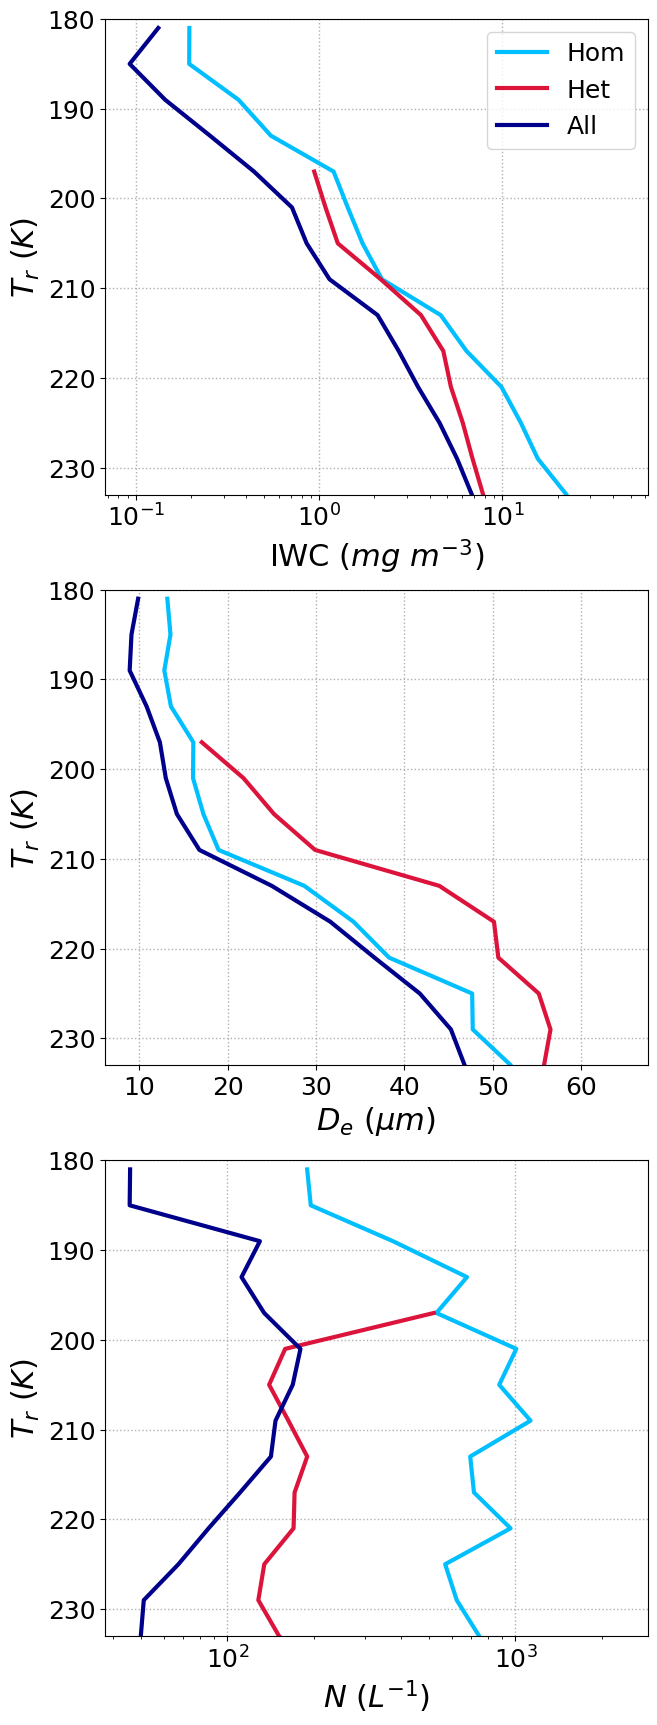

In [561]:
#######
fig, axis = plt.subplots(3, 1, figsize=(7,21))

i = 0
axis[i].plot(IWC_hom, T, linewidth= 3, color='deepskyblue', label='Hom')
axis[i].plot(IWC_het, T, linewidth= 3, color='crimson'    , label='Het')
axis[i].plot(IWC    , T, linewidth= 3, color='darkblue'   , label='All')
axis[i].set_xlabel('IWC ($mg$ $m^{-3}$)', fontsize = '22')
axis[i].set_ylabel('$T_r$ ($K$)', fontsize = '22')
#axis[i].set_yticks([-400, -300, -200, -100, 0])
#axis[i].set_xlim([0, 1000])
axis[i].set_ylim([180, 233])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].set_xscale('log')
#axis[i].legend(fontsize = '18', loc='lower right')
#plt.title(str(traj_t)+'-hr Lagrangian Trajectories, JJA 2018-2021', fontsize = 22)
legend = axis[i].legend(fontsize=18)    
axis[i].invert_yaxis()

i = 1
axis[i].plot(De_hom, T, linewidth= 3, color='deepskyblue', label='Hom')
axis[i].plot(De_het, T, linewidth= 3, color='crimson'    , label='Het')
axis[i].plot(De    , T, linewidth= 3, color='darkblue'   , label='All')
axis[i].set_xlabel('$D_e$ ($μm$)', fontsize = '22')
axis[i].set_ylabel('$T_r$ ($K$)', fontsize = '22')
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].set_ylim([180, 233])
axis[i].invert_yaxis()

i = 2
axis[i].plot(ni_hom, T, linewidth= 3, color='deepskyblue', label='Hom')
axis[i].plot(ni_het, T, linewidth= 3, color='crimson'    , label='Het')
axis[i].plot(ni    , T, linewidth= 3, color='darkblue'   , label='All')
axis[i].set_xlabel('$N$ ($L^{-1}$)', fontsize = '22')
axis[i].set_ylabel('$T_r$ ($K$)', fontsize = '22')
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].set_xscale('log')
axis[i].set_ylim([180, 233])
axis[i].invert_yaxis()

plt.show()

## Interpolate satellite T to MERRA2 vertical levels

In [539]:
id_trim1 = np.where(merra_T_mean_arctic >= 250)[0][-1]
id_trim2 = np.where(merra_T_mean_arctic <= 218)[0][0] + 1
T_trim  = merra_T_mean_arctic[id_trim1:id_trim2]
H_trim  = merra_H_mean_arctic[id_trim1:id_trim2]

T_rev = T[::-1]
f_T   = interpolate.interp1d(T_trim, H_trim, fill_value='extrapolate')
H_rev = f_T(T_rev)
H     = H_rev[::-1]

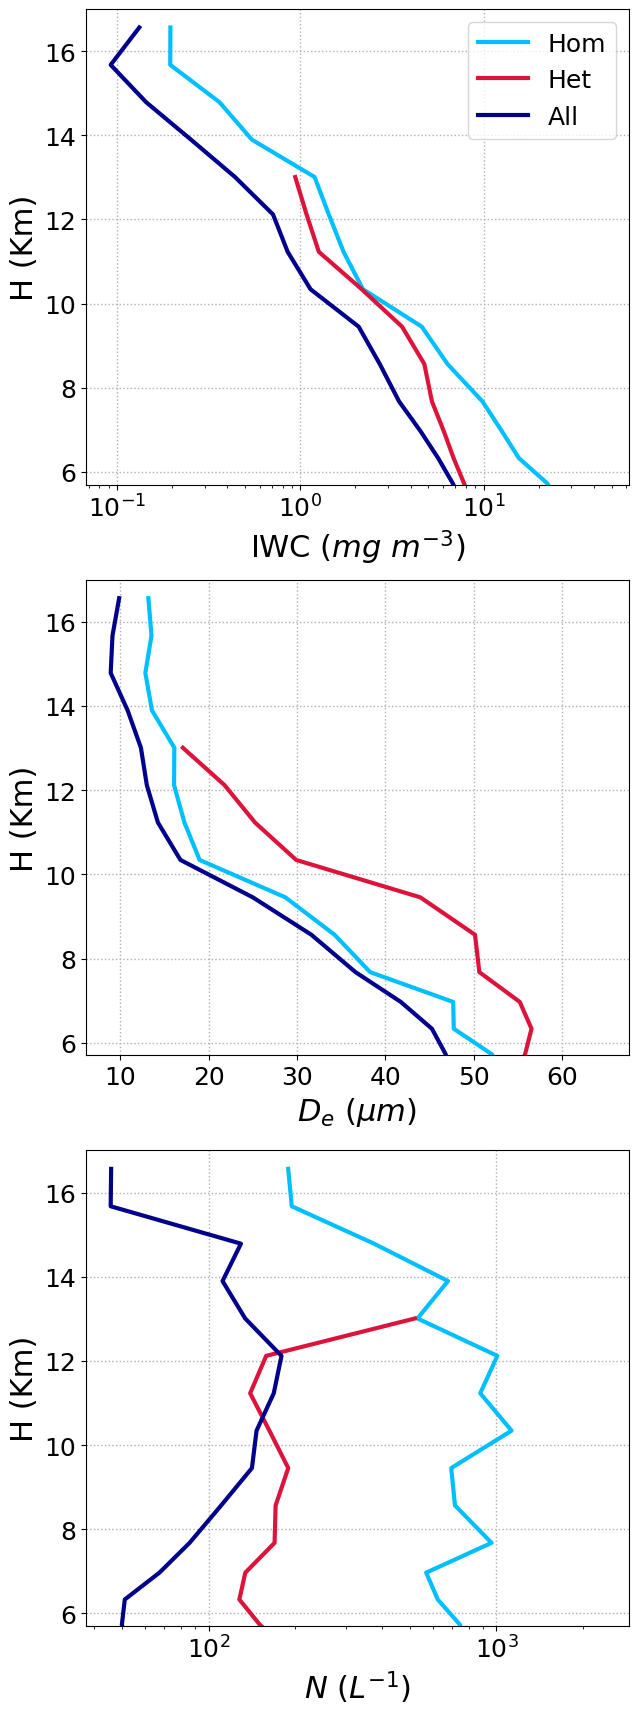

In [565]:
#######
fig, axis = plt.subplots(3, 1, figsize=(7,21))

i = 0
axis[i].plot(IWC_hom, H / 1000, linewidth= 3, color='deepskyblue', label='Hom')
axis[i].plot(IWC_het, H / 1000, linewidth= 3, color='crimson'    , label='Het')
axis[i].plot(IWC    , H / 1000, linewidth= 3, color='darkblue'   , label='All')
axis[i].set_xlabel('IWC ($mg$ $m^{-3}$)', fontsize = '22')
axis[i].set_ylabel('H (Km)', fontsize = '22')
#axis[i].set_yticks([-400, -300, -200, -100, 0])
#axis[i].set_xlim([0, 1000])
axis[i].set_ylim([5.7, 17])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].set_xscale('log')
#axis[i].legend(fontsize = '18', loc='lower right')
#plt.title(str(traj_t)+'-hr Lagrangian Trajectories, JJA 2018-2021', fontsize = 22)
legend = axis[i].legend(fontsize=18)    

i = 1
axis[i].plot(De_hom, H / 1000, linewidth= 3, color='deepskyblue', label='Hom')
axis[i].plot(De_het, H / 1000, linewidth= 3, color='crimson'    , label='Het')
axis[i].plot(De    , H / 1000, linewidth= 3, color='darkblue'   , label='All')
axis[i].set_xlabel('$D_e$ ($μm$)', fontsize = '22')
axis[i].set_ylabel('H (Km)', fontsize = '22')
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].set_ylim([5.7, 17])

i = 2
axis[i].plot(ni_hom, H / 1000, linewidth= 3, color='deepskyblue', label='Hom')
axis[i].plot(ni_het, H / 1000, linewidth= 3, color='crimson'    , label='Het')
axis[i].plot(ni    , H / 1000, linewidth= 3, color='darkblue'   , label='All')
axis[i].set_xlabel('$N$ ($L^{-1}$)', fontsize = '22')
axis[i].set_ylabel('H (Km)', fontsize = '22')
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', linewidth=1)
axis[i].set_xscale('log')
axis[i].set_ylim([5.7, 17])

plt.show()

In [589]:
i1 = 2
i2 = 16
H_s       = H      [i1:i2] / 1000
IWC_hom_s = IWC_hom[i1:i2] / 1000
Re_hom_s  = De_hom [i1:i2] / 2

# effective radius allowed range based on Fu [1996]: 9.315 -  65.120 um

i_de = np.where((Re_hom_s >= 9.315) & (Re_hom_s <= 65.120) )

H_s       = H_s      [i_de]
IWC_hom_s = IWC_hom_s[i_de]
Re_hom_s  = Re_hom_s [i_de]

H_pd   = pd.DataFrame(H_s       , columns=['z (km)'])
IWC_pd = pd.DataFrame(IWC_hom_s , columns=['IWC (g/m^-3)'])
Re_pd  = pd.DataFrame(Re_hom_s  , columns=['R_eff (um)'])

df     = pd.concat([H_pd, IWC_pd, Re_pd], axis=1)

np.savetxt(r'../../libRadtran-2.0.4-compiled/CCT/CCT_hom.DAT', df.values)#, fmt='%d')

## RTM outputs

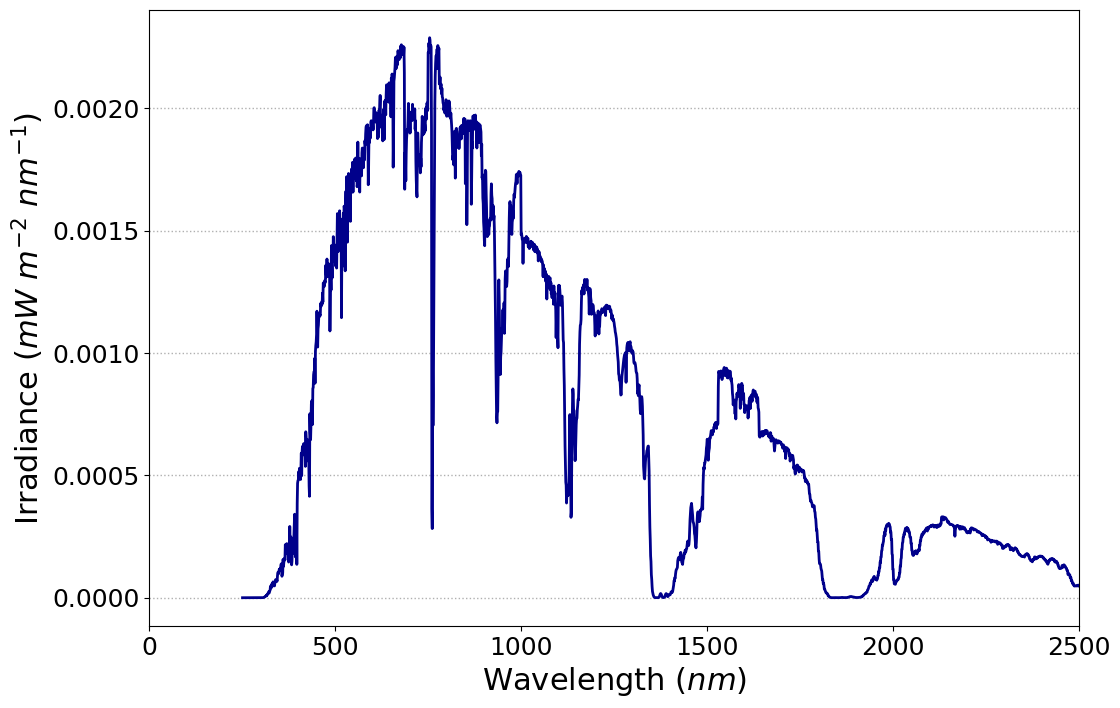

In [590]:
out_labels = ['lambda', 'dir', 'edn', 'eup', 'uavgdir', 'uavgdn', 'uavgup']

out   = '/home/eerfani/libRadtran-2.0.4-compiled/CCT/UVSPEC_CCT_HOM.OUT'  # 
#out = np.array([float(df_out.columns[i]) for i in range(len(df_out.columns))]) # [km]

df_out = pd.read_fwf(out, delimiter = " ")
np_out = df_out.to_numpy() 
#wavelength = np_out[:,0]
direct = np_out[:,1]

df = pd.read_csv(out, sep=" ", header=None)
df.dropna(axis=1, how='all')
wave1 = df[1].dropna().to_numpy()
wave2 = df[2].dropna().to_numpy()
wavelength = np.concatenate([wave2, wave1])

####
start_row = 10
solar = '/home/eerfani/libRadtran-2.0.4-compiled/data/solar_flux/kurudz_1.0nm.dat'  # subarctic winter

df_solar = pd.read_fwf(solar, delimiter = " ")
np_solar = df_solar[start_row:].to_numpy() 
 
data = np_solar[:,1]   
wavelength2 = np.array([float(data[i].split()[0]) for i in range(len(data))]) # [nm]
irradiance = np.array([float(data[i].split()[1]) for i in range(len(data))]) # [mW/ (m2 nm)]


####
fig   = plt.figure(figsize=(12,8))
axis  = plt.axes()                     
#axis.plot(np.arange(250,len(irradiance)+250), irradiance, color='red', linewidth=2, label='Solar')
axis.plot(wavelength[1:], direct, color='darkblue', linewidth=2, label='RTM')
axis.set_xlabel('Wavelength ($nm$)', fontsize = '22')
axis.set_ylabel('Irradiance ($mW$ $m^{-2}$ $nm^{-1}$)', fontsize = '22')
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', axis='y', linewidth=1)
axis.set_xlim([0, 2500])
#axis.set_ylim([1e-5, 1.1e4])
plt.show()

In [582]:
df

,z (km),IWC (g/m^-3),R_eff (um)
0,16.561742,0.000195,6.58280
1,15.673202,0.000195,6.75970
2,14.784663,0.000362,6.41215
3,13.896123,0.000544,6.78620
4,13.007583,0.001196,8.05330
5,12.119044,0.001429,8.03700
6,11.230504,0.001721,8.62485
7,10.341964,0.002196,9.48155
8,9.453424,0.004599,14.33460
9,8.564885,0.006360,17.11815


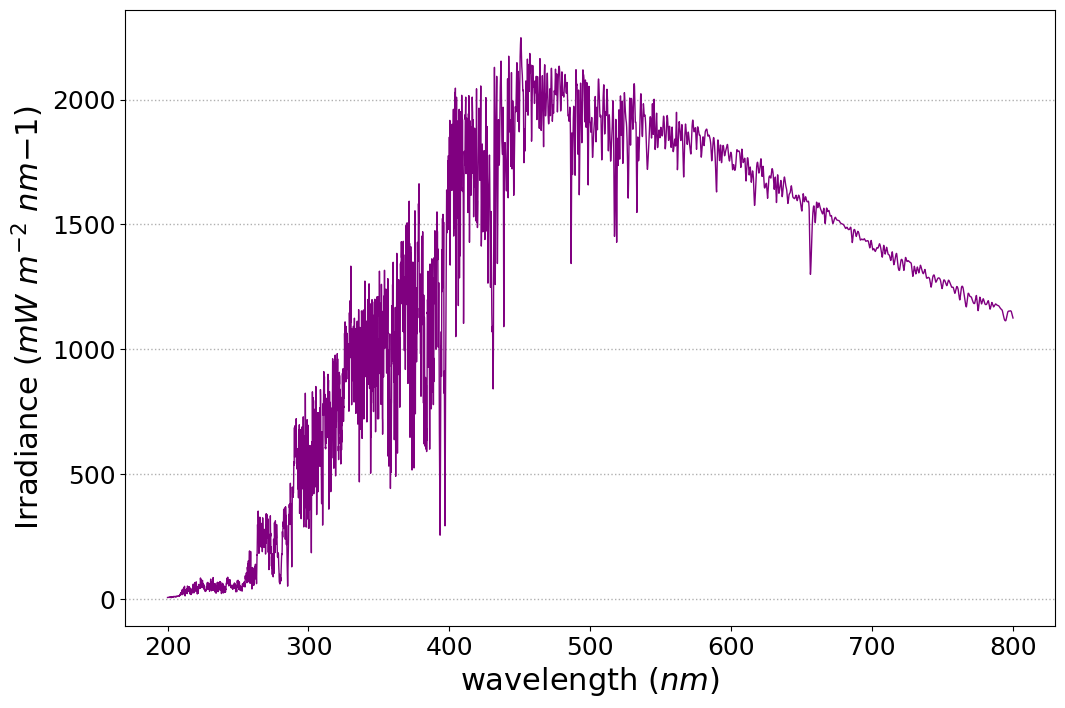

In [2]:
start_row = 5
apm = '/home/eerfani/libRadtran-2.0.4-compiled/data/solar_flux/atlas_plus_modtran'  # extraterrestrial spectrum

df_apm  = pd.read_fwf(apm, delimiter = " ")
np_apm = df_apm[start_row:].to_numpy() 
 
data = np_apm[:,0]   
wavelength = np.array([float(data[i].split()[0]) for i in range(len(data))]) # [nm]
irradiance = np.array([float(data[i].split()[1]) for i in range(len(data))]) # [mW/ (m2 nm)]

####
fig   = plt.figure(figsize=(12,8))
axis  = plt.axes()
                      
axis.plot(wavelength[:-1:1], irradiance[:-1:1], linewidth= 1, color='purple', label='Irradiance')
axis.set_ylabel('Irradiance ($mW$ $m^{-2}$ $nm{-1}$)', fontsize = '22')
axis.set_xlabel('wavelength ($nm$)', fontsize = '22')
#axis.set_yticks([-400, -300, -200, -100, 0])
#axis.set_xlim([0, 1000])
#axis.set_ylim([-420, 20])
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', axis='y', linewidth=1)
#axis.legend(fontsize = '18', loc='lower right')
#plt.title(str(traj_t)+'-hr Lagrangian Trajectories, JJA 2018-2021', fontsize = 22)

#legend = ax.legend(fontsize=18)    
plt.show()

## RTM standard sub-arctic profiles

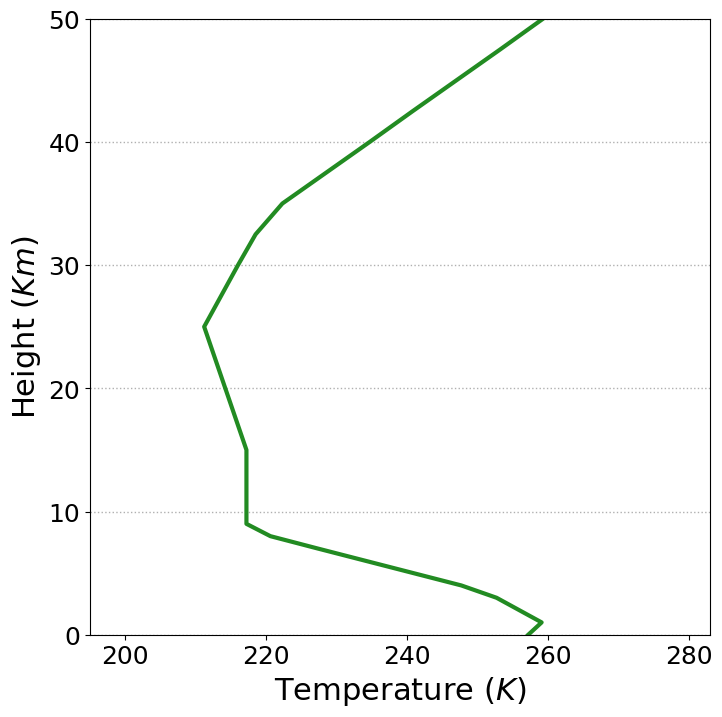

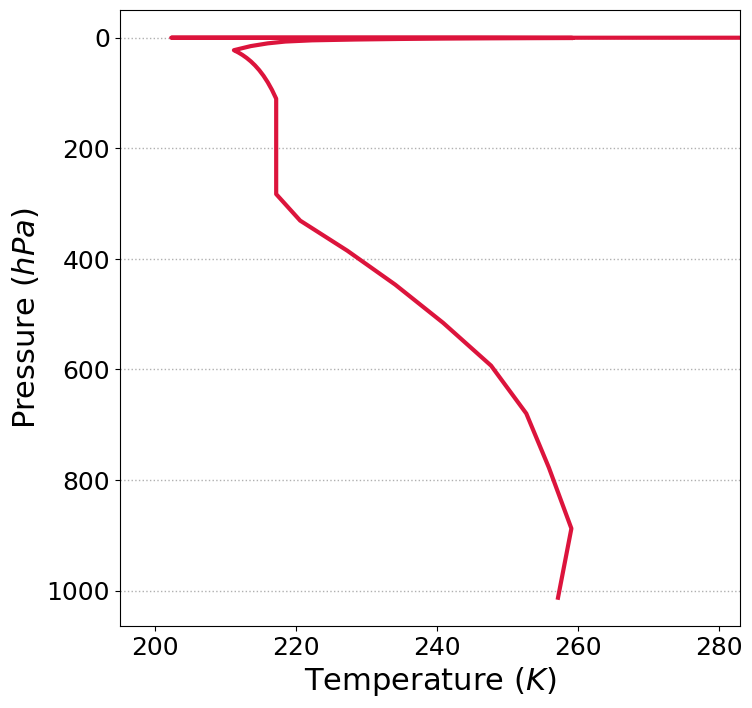

In [429]:
start_row = 1
asw = '/home/eerfani/libRadtran-2.0.4-compiled/data/atmmod/afglsw.dat'  # subarctic winter

df_asw  = pd.read_fwf(asw, delimiter = " ")
np_asw = df_asw[start_row:].to_numpy() 

 
data = np_asw[:,1]  

z = np.array([float(data[i].split()[0]) for i in range(len(data))]) # [km]
P = np.array([float(data[i].split()[1]) for i in range(len(data))]) # [hPa]
T = np.array([float(data[i].split()[2]) for i in range(len(data))]) # [K]

####
fig   = plt.figure(figsize=(8,8))
axis  = plt.axes()
                      
axis.plot(T, z, linewidth= 3, color='forestgreen', label='Pressure')
axis.set_ylabel('Height ($Km$)', fontsize = '22')
axis.set_xlabel('Temperature ($K$)', fontsize = '22')
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', axis='y', linewidth=1)
axis.set_xlim([195, 283])
axis.set_ylim([0, 50])
#axis.set_yscale('log')
plt.show()

####
fig   = plt.figure(figsize=(8,8))
axis  = plt.axes()
                      
axis.plot(T, P, linewidth= 3, color='crimson', label='Pressure')
axis.set_ylabel('Pressure ($hPa$)', fontsize = '22')
axis.set_xlabel('Temperature ($K$)', fontsize = '22')
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', axis='y', linewidth=1)
#axis.set_ylim([1.1e3, 1e-5])
#axis.set_ylim([1e-5, 1.1e4])
axis.set_xlim([195, 283])
#axis.set_yscale('log')
plt.gca().invert_yaxis()
plt.show()

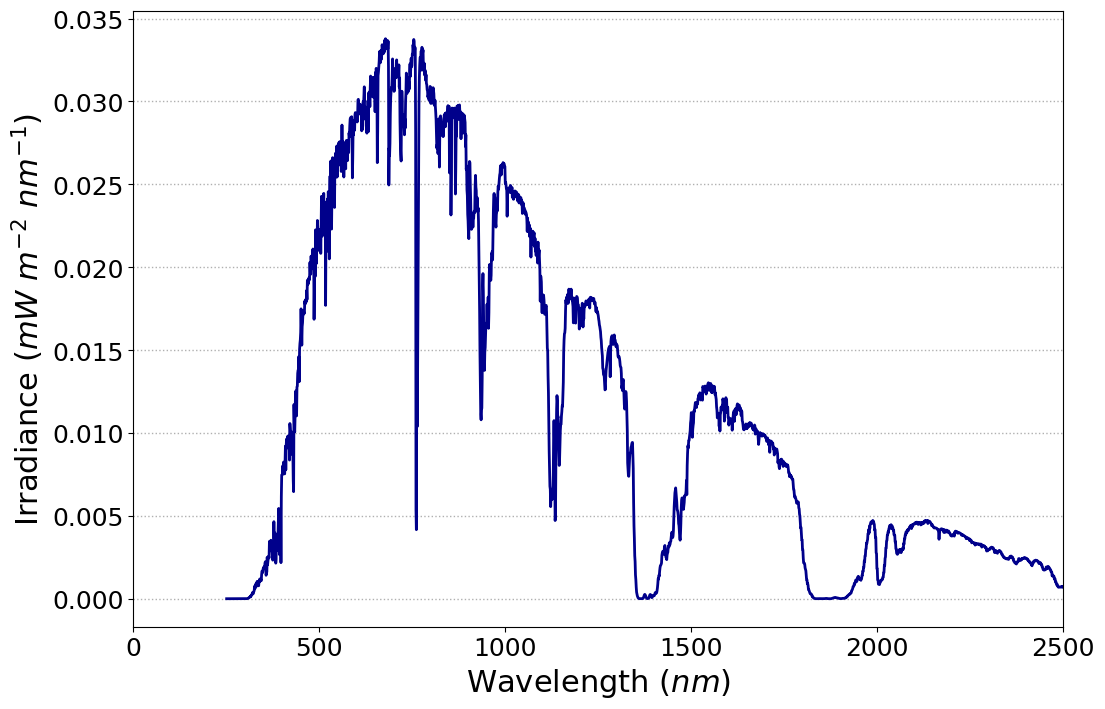

In [125]:
out_labels = ['lambda', 'dir', 'edn', 'eup', 'uavgdir', 'uavgdn', 'uavgup']

out   = '/home/eerfani/libRadtran-2.0.4-compiled/CCT/UVSPEC_CCT.OUT'  # 
#out = np.array([float(df_out.columns[i]) for i in range(len(df_out.columns))]) # [km]

df_out = pd.read_fwf(out, delimiter = " ")
np_out = df_out.to_numpy() 
#wavelength = np_out[:,0]
direct = np_out[:,1]

df = pd.read_csv(out, sep=" ", header=None)
df.dropna(axis=1, how='all')
wave1 = df[1].dropna().to_numpy()
wave2 = df[2].dropna().to_numpy()
wavelength = np.concatenate([wave2, wave1])

####
start_row = 10
solar = '/home/eerfani/libRadtran-2.0.4-compiled/data/solar_flux/kurudz_1.0nm.dat'  # subarctic winter

df_solar = pd.read_fwf(solar, delimiter = " ")
np_solar = df_solar[start_row:].to_numpy() 
 
data = np_solar[:,1]   
wavelength2 = np.array([float(data[i].split()[0]) for i in range(len(data))]) # [nm]
irradiance = np.array([float(data[i].split()[1]) for i in range(len(data))]) # [mW/ (m2 nm)]


####
fig   = plt.figure(figsize=(12,8))
axis  = plt.axes()                     
#axis.plot(np.arange(250,len(irradiance)+250), irradiance, color='red', linewidth=2, label='Solar')
axis.plot(wavelength[1:], direct, color='darkblue', linewidth=2, label='RTM')
axis.set_xlabel('Wavelength ($nm$)', fontsize = '22')
axis.set_ylabel('Irradiance ($mW$ $m^{-2}$ $nm^{-1}$)', fontsize = '22')
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', axis='y', linewidth=1)
axis.set_xlim([0, 2500])
#axis.set_ylim([1e-5, 1.1e4])
plt.show()

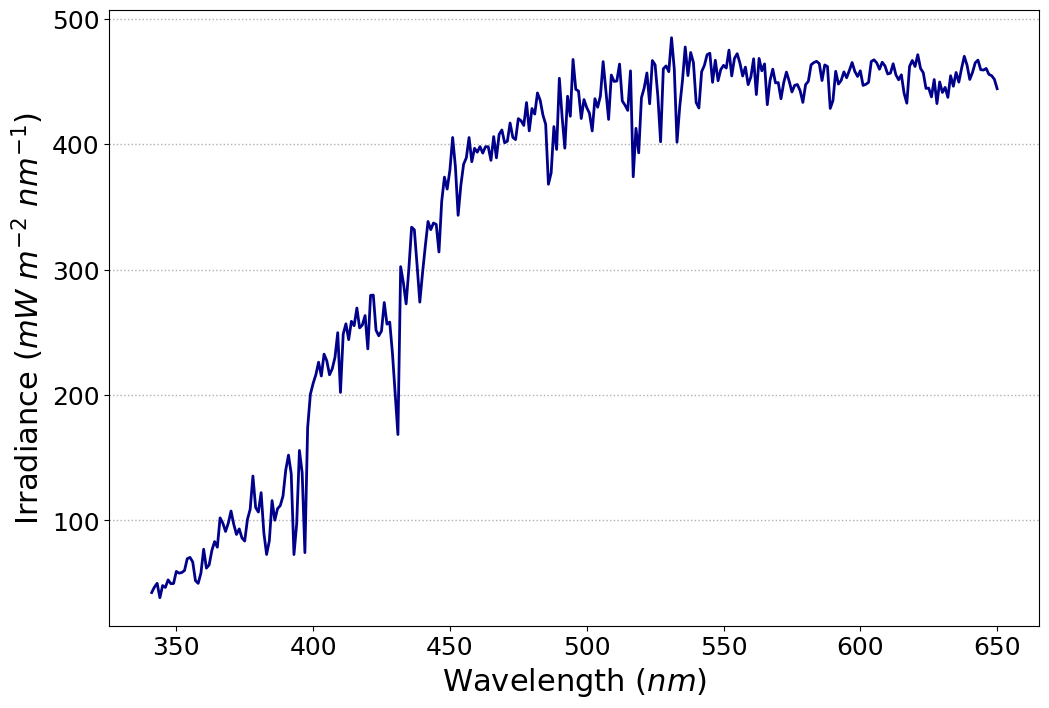

In [71]:
out_labels = ['lambda', 'dir', 'edn', 'eup', 'uavgdir', 'uavgdn', 'uavgup']

out = '/home/eerfani/libRadtran-2.0.4-compiled/CCT/UVSPEC_CLEAR.OUT'  # 

df_out = pd.read_fwf(out, delimiter = " ")
np_out = df_out.to_numpy() 
wavelength = np_out[:,0]
direct = np_out[:,1]
# out = np.array([float(df_out.columns[i]) for i in range(len(df_out.columns))]) # [km]

####
fig   = plt.figure(figsize=(12,8))
axis  = plt.axes()                     
axis.plot(wavelength, direct, color='darkblue', linewidth=2, label='outputs')
axis.set_xlabel('Wavelength ($nm$)', fontsize = '22')
axis.set_ylabel('Irradiance ($mW$ $m^{-2}$ $nm^{-1}$)', fontsize = '22')
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', axis='y', linewidth=1)
#axis.set_ylim([1.1e3, 1e-5])
#axis.set_ylim([1e-5, 1.1e4])
plt.show()

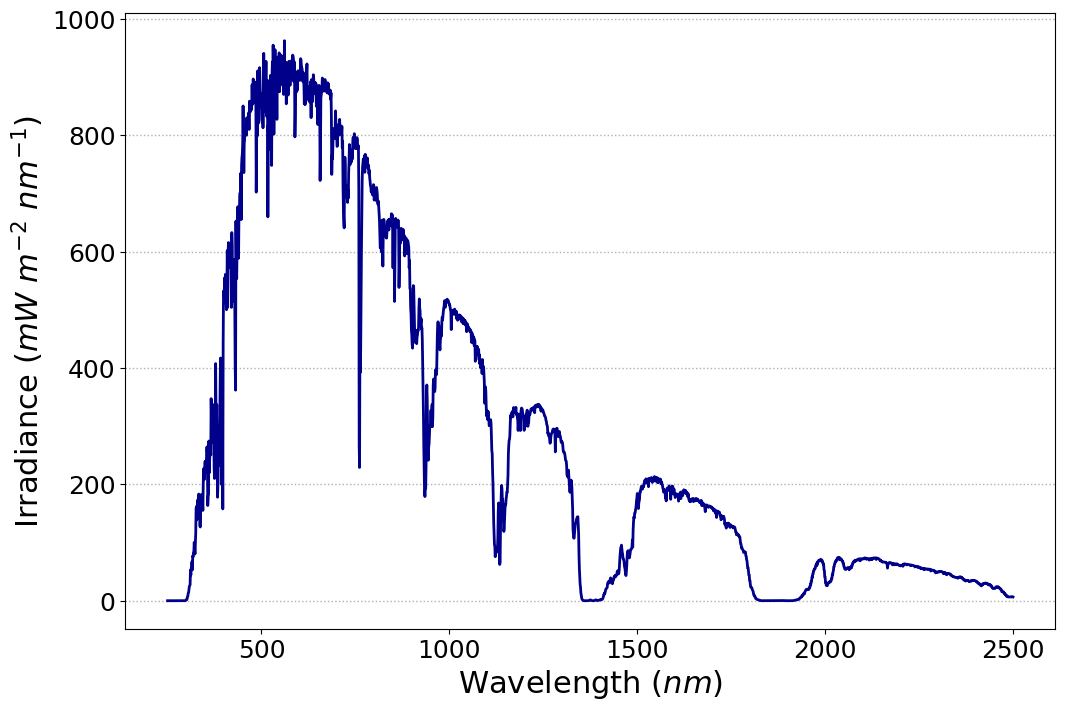

In [83]:
out = '/home/eerfani/libRadtran-2.0.4-compiled/CCT/UVSPEC_LOWTRAN_SOLAR.OUT'  # 

df_out = pd.read_fwf(out, delimiter = " ", header=None)
np_out = df_out.to_numpy() 
#wavelength = np_out[:,0]
edir = np_out[:,1]

df = pd.read_csv(out, sep=" ", header=None)
df.dropna(axis=1, how='all')
wave1 = df[1].dropna().to_numpy()
wave2 = df[2].dropna().to_numpy()
wavelength = np.concatenate([wave2, wave1])

####
fig   = plt.figure(figsize=(12,8))
axis  = plt.axes()                     
axis.plot(wavelength, edir, color='darkblue', linewidth=2)
axis.set_xlabel('Wavelength ($nm$)', fontsize = '22')
axis.set_ylabel('Irradiance ($mW$ $m^{-2}$ $nm^{-1}$)', fontsize = '22')
axis.tick_params(axis='both', which='major', labelsize=18)
axis.grid(linestyle=':', axis='y', linewidth=1)
#axis.set_ylim([1.1e3, 1e-5])
#axis.set_ylim([1e-5, 1.1e4])
#plt.legend(fontsize=18)
plt.show()